In [1]:
%matplotlib notebook
from scipy import stats 
from scipy.optimize import curve_fit as cf 
import numpy as np  
import matplotlib.pylab as pylab

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
import matplotlib.patches as mpatches

import pandas as pd

## import database using pandas, engine = python helps with encoding issues
massShooting = pd.read_csv('data/GV_database.csv',engine='python')

In [2]:
print(massShooting.columns)
massShooting = massShooting.drop(columns=['sources', 'mental_health_sources',
       'sources_additional_age'])
print(massShooting.columns)

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter', 'age_of_shooter_2',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year'],
      dtype='object')
Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter', 'age_of_shooter_2',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'latitude', 'longitude', 'type',
       'year'],
      dtype='object')


<IPython.core.display.Javascript object>


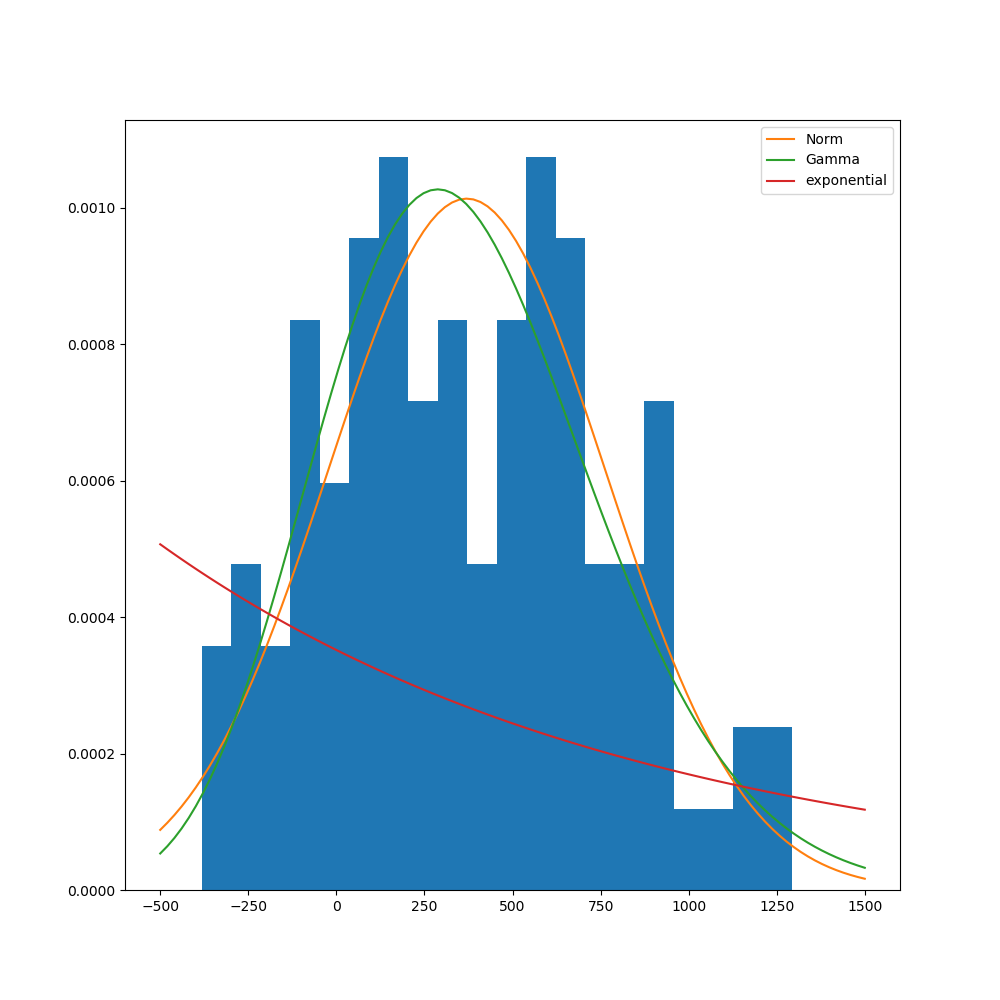

In [21]:

# create some normal random noisy data
ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20
#print(ser)

# plot normed histogram
fig8 = pylab.figure(figsize=(10,10))
ax= fig8.add_subplot(111)
pylab.hist(ser, density=True, bins=20)


# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = pylab.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
pylab.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(ser)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
pylab.plot(lnspc, pdf_gamma, label="Gamma")

a,b = stats.expon.fit(ser, floc=-1000)
pdf_exp = stats.expon.pdf(lnspc,a,b)
pylab.plot(lnspc, pdf_exp, label='exponential')

# guess what :) 
#ab,bb = stats.expon.fit(ser, floc=0)  
#pdf_beta = stats.expon.pdf(lnspc, ab, bb,cb, db)  
#plt.plot(lnspc, pdf_beta, label="Beta")

pylab.legend(loc='best')

pylab.show()  


In [28]:

print(len(massShooting))
print(massShooting.columns)
print(min(massShooting['year'])) 
print(max(massShooting['year']))
print(massShooting['race'])


114
Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year'],
      dtype='object')
1982
2019
0      White
1      White
2          -
3      Black
4      Black
       ...  
109    white
110    white
111    white
112    white
113    white
Name: race, Length: 114, dtype: object


<IPython.core.display.Javascript object>


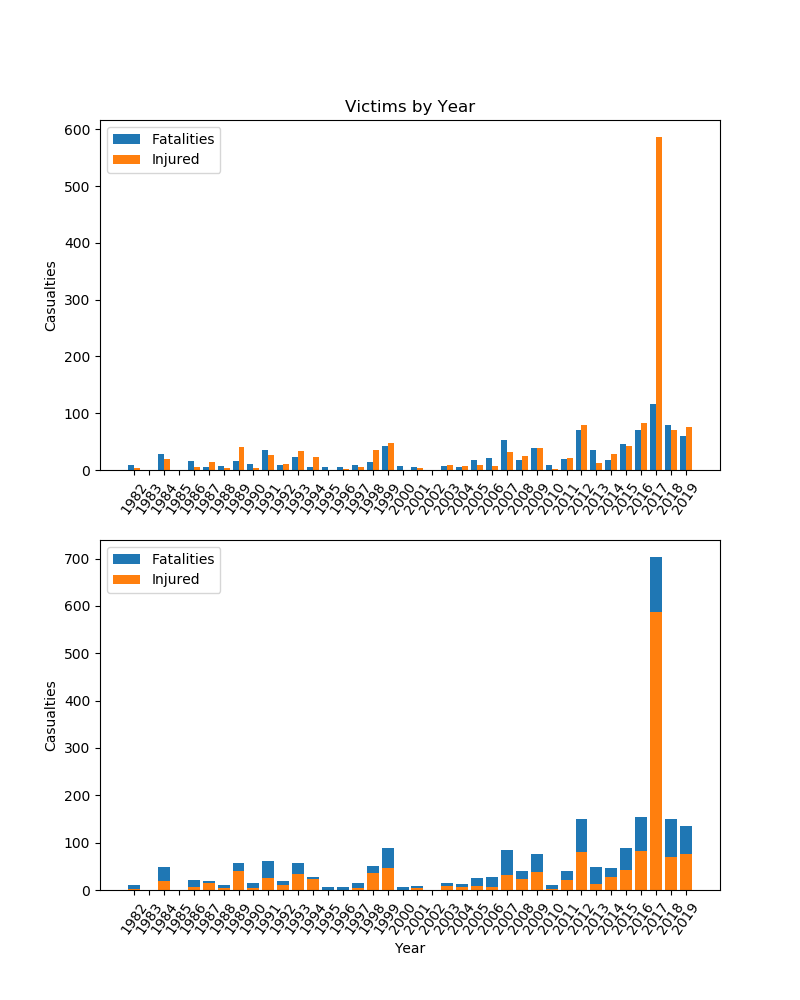

In [13]:
## plotting bar graphs of the number of fatalities and injuries on the same plot 

#setting up variables that will be use in the loop and plotting below
year = list(range(1982, 2020))
fatal = np.zeros(38)
injured = np.zeros(38)
total = np.zeros(38)

# looping through the database adding up the fatalities and injuries for each year
for i in range(len(year)): #loop through years 
    for j in range(len(massShooting)): #loop through rows of mass Shooting
        if massShooting.loc[j, 'year'] == year[i]: 
            fatal[i] += massShooting.loc[j,'fatalities']#'fatalities'
            injured[i] += massShooting.loc[j,'injured']#'injured'
            total[i] += massShooting.loc[j,'total_victims']#'total_victims'       

# parameter to be used in top graph 
width = 0.4  

# make the figure
fig7 = plt.figure(figsize=(8,10))
ax= fig7.add_subplot(211)

# plot top sub-figure with bars beside one another 
plt.bar(ind, fatal, width, label='Fatalities')
plt.bar(ind + width, injured, width, label='Injured')
#plt.bar(ind + 2*width, total, width, label='Total')

# plot top labels
plt.ylabel('Casualties')
plt.title('Victims by Year')
plt.xticks(ind + width/2, year, rotation=55)
plt.legend(loc='best')

# plot axes of bottom sub plot 
ax= fig7.add_subplot(212)

# plot data stacked 
plt.bar(year, fatal, width=0.8, label='Fatalities', bottom=injured)
plt.bar(year, injured, width=0.8, label='Injured')

#plot labels of bottom plot 
#plt.xticks(ind, year, rotation=55)
plt.ylabel("Casualties")
plt.xlabel("Year")
plt.legend(loc='best')
plt.subplots_adjust(wspace=0.5)
plt.show()


<IPython.core.display.Javascript object>


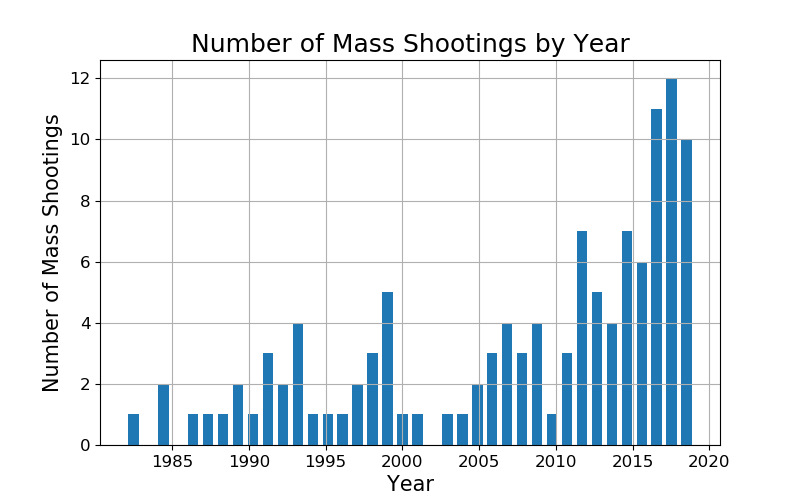

In [70]:

## make the figure
fig2 = plt.figure(figsize=(8,5))
ax= fig2.add_subplot(111)

num_years = max(massShooting['year']) - min(massShooting['year']) +1

# plot the data
massShooting['year'].hist(bins=num_years, xlabelsize=12, ylabelsize=12, rwidth=0.7)

#label the figure
ax.set_title('Number of Mass Shootings by Year', fontsize = 18)
ax.set_ylabel("Number of Mass Shootings", fontsize = 15)
ax.set_xlabel("Year", fontsize = 15);

plt.show()

In [137]:
def expon_growth(x, a, b, c): 
    return a*np.exp(-b*x) + c

def line_fit(x,m,b): 
    return m*x +b

def prbla_fit(x,a,b,c): 
    return a*x**2 + b*x + c

def cubic_fit(x,a,b,c,d): 
    return a*x**3 + b*x**2 + c*x +d

def make_dic(array, set_a): 
    dic = {}
    for x in range(len(array)): 
        if array[x] not in dic: 
            dic[array[x]] = 0
            
        if array[x] in set_a:  
            dic[array[x]] += 1
        else: 
            continue
    return dic

## change the type to a list so it can be used in hist function
x_hist = sorted(massShooting['year'].tolist())
x_set = set(x_hist)
num_years = max(massShooting['year']) - min(massShooting['year']) +1

x_y_dic = make_dic(x_hist, x_set)


zeroed_x_val = list(x_y_dic.keys())
for x in range(len(zeroed_x_val)):
    zeroed_x_val[x] = zeroed_x_val[x] - 1980

line_coeff, line_pcov = cf(line_fit, list(x_y_dic.keys()),list(x_y_dic.values()))
exp_coeff, exp_pcov = cf(expon_growth, list(x_y_dic.keys()),list(x_y_dic.values()))
prbla_coeff, prbla_pcov = cf(prbla_fit, list(x_y_dic.keys()),list(x_y_dic.values()))
cubic_coeff, cubic_pcov = cf(cubic_fit, list(x_y_dic.keys()),list(x_y_dic.values()))

print('line', line_coeff, line_pcov)
print('exp', exp_coeff, exp_pcov)
print('porabola', prbla_coeff, prbla_pcov)
print('cubic', cubic_coeff, cubic_pcov)

line [ 1.94920349e-01 -3.86770729e+02] [[ 1.12485488e-03 -2.25128454e+00]
 [-2.25128454e+00  4.50584918e+03]]
exp [1.         1.         3.34285714] [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
porabola [ 1.28840769e-02 -5.13718955e+01  5.12091011e+04] [[ 7.42326120e-06 -2.97106235e-02  2.97273654e+01]
 [-2.97106235e-02  1.18913533e+02 -1.18981224e+05]
 [ 2.97273654e+01 -1.18981224e+05  1.19049638e+08]]
cubic [ 8.66946068e-04 -5.19094201e+00  1.03604024e+04 -6.89260356e+06] [[ 5.13663570e-08 -3.08308487e-04  6.16827113e-01 -4.11351131e+02]
 [-3.08308491e-04  1.85051859e+00 -3.70230916e+03  2.46901186e+06]
 [ 6.16827129e-01 -3.70230921e+03  7.40718464e+06 -4.93974943e+09]
 [-4.11351147e+02  2.46901192e+06 -4.93974950e+09  3.29426044e+12]]


/Users/risa/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


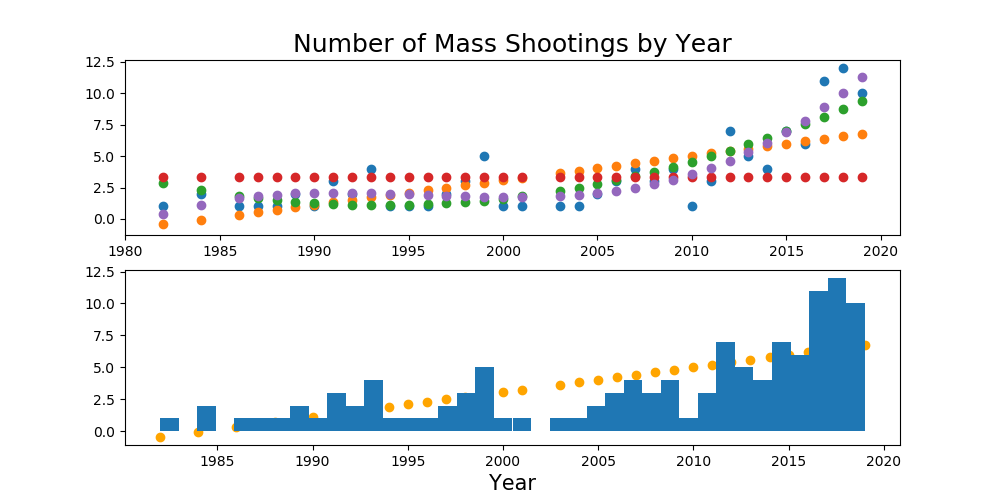

In [124]:
## make the figure
fig2 = plt.figure(figsize=(10,5))
ax.set_ylabel("Number of Mass Shootings", fontsize = 15)
ax= fig2.add_subplot(211)

x_array = np.asarray(list(x_y_dic.keys()))
line_y = line_fit(x_array, coeff[0], coeff[1])
prbla_y = prbla_fit(x_array, *prbla_coeff)
exp_y = expon_growth(x_array, *exp_coeff)
cubic_y = cubic_fit(x_array, *cubic_coeff)

# plot the data
ax.set_title('Number of Mass Shootings by Year', fontsize = 18)
plt.scatter(x_y_dic.keys(), x_y_dic.values())
plt.scatter(x_y_dic.keys(), line_y)
plt.scatter(x_y_dic.keys(), prbla_y)
plt.scatter(x_y_dic.keys(), exp_y)
plt.scatter(x_y_dic.keys(), cubic_y)
#label the figure

ax = fig2.add_subplot(212)

plt.scatter(x_y_dic.keys(), fitted_y, color='orange')
plt.hist(massShooting['year'], bins=num_years, rwidth=1.0)


ax.set_xlabel("Year", fontsize = 15);

plt.show()


[1500 1501 1502 ... 2997 2998 2999]


<IPython.core.display.Javascript object>


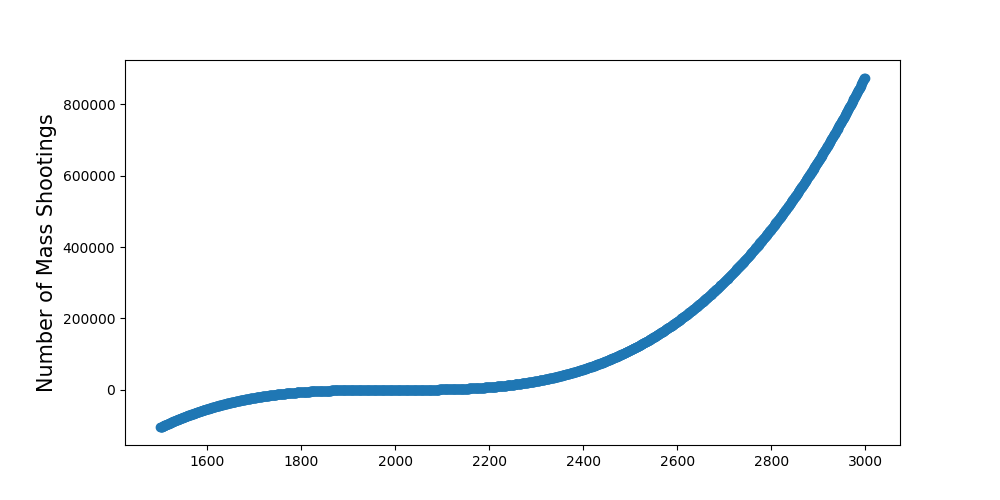

In [122]:
stats.chisquare(x_array, cubic_y)

cube_x = np.array(range(1500,3000))
print(cube_x)
cube_y = cubic_fit(cube_x, *cubic_coeff)

fig9 = plt.figure(figsize=(10,5))
ax= fig9.add_subplot(111)

plt.scatter(cube_x, cube_y)
plt.show()




In [110]:
stats.chisquare(x_array,prbla_y)

Power_divergenceResult(statistic=66571701.58904207, pvalue=0.0)

<IPython.core.display.Javascript object>


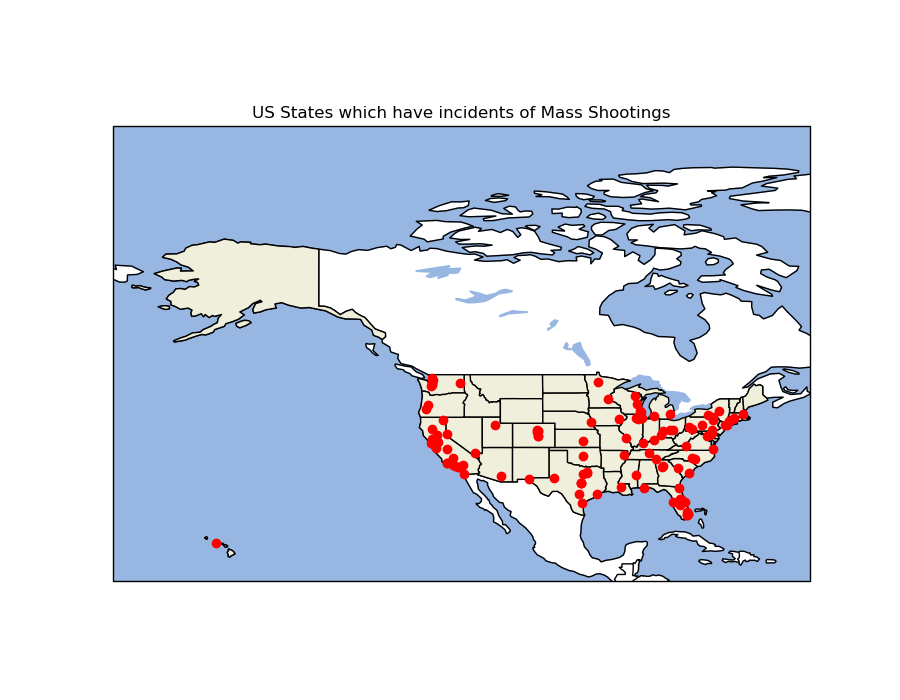

/Users/risa/miniconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_1_states_provinces_lakes_shp.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


In [72]:
lon = massShooting['longitude']
lat = massShooting['latitude']

## make the figure
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

### plots features on the map (the ocean, major lakes, and black boarders etc..)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)

## the line below focuses the map on North America, to modify see note below
## NOTE: extent[start long, end long, start lat, end lat] based on location of USA 
ax.set_extent([-175, -60, 15, 90])

## makes a function that will colour the geometry that is passed into it -> the us states in this example
def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.859375)
        return {'facecolor': facecolor, 'edgecolor': 'black'}

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),styler=colorize_state, zorder=1)
    
## plot the points for each mass shooting on top of map background              
ax.scatter(lon, lat,zorder=2,color='Red')
ax.set_title('US States which have incidents of Mass Shootings')

plt.show()  

<IPython.core.display.Javascript object>


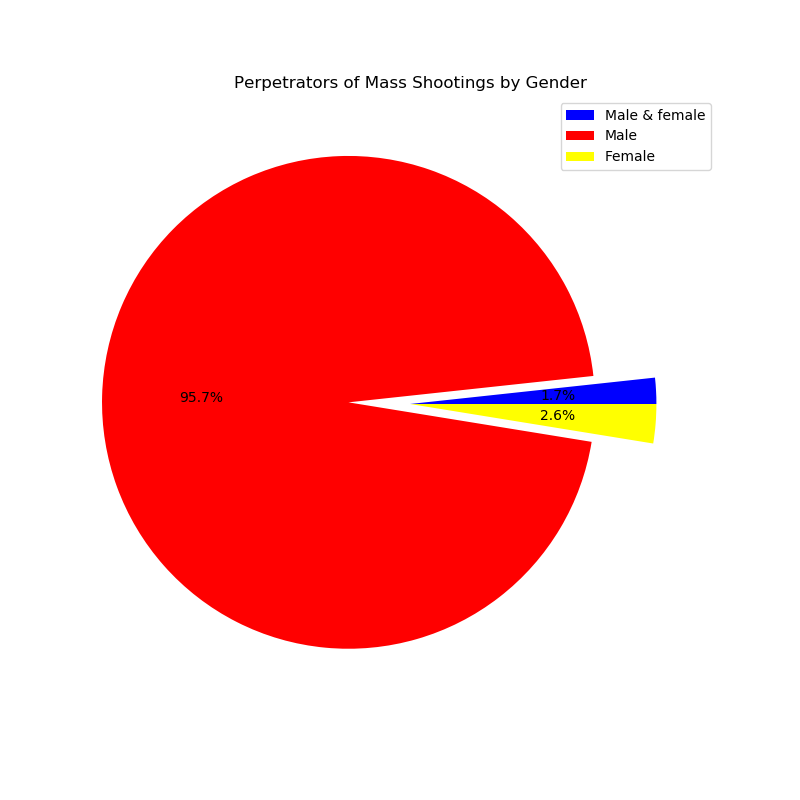

In [132]:
gender_breakdown = { }

# loop over rows in dataset looking at the 'gender' column and count occurances in gender_breakdown
for x in massShooting['gender']:
    gen = x.capitalize().strip()
    if len(gen) == 1: 
        if gen == 'M': 
            gen = 'Male' 
        else: 
            gen = 'Female'   
    if gen not in gender_breakdown:
        gender_breakdown[gen] = 0
    gender_breakdown[gen] += 1    

# creating the figure
colors = ['blue', 'red', 'yellow']
fig3 = plt.figure(figsize=(8,8))
ax= fig3.add_subplot(111)

# plotting the data 
plt.pie( 
    gender_breakdown.values(),
    # with no shadows
    shadow=False,
    # with colors defined as above
    colors = colors,
    # with one slide exploded out
    explode=(0, 0.25, 0),
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# set labels on plot
ax.set_title('Perpetrators of Mass Shootings by Gender')
ax.legend(gender_breakdown.keys(),loc=1)

# View the plot
plt.show()


<IPython.core.display.Javascript object>


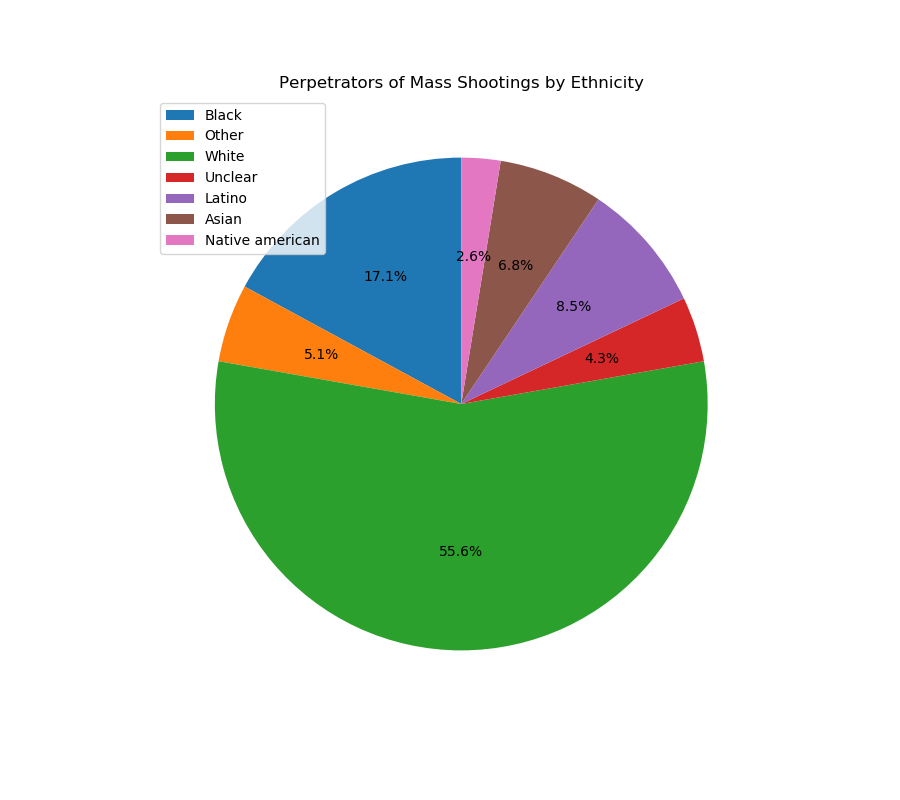

In [160]:
race_dict = {}
for y in massShooting['race']:
    cap_race = y.capitalize().strip() # makes the word capital for comparison
    # and strips any blank spaces
    if cap_race == '-':
        cap_race = 'Unclear'
    if cap_race not in race_dict:
        race_dict[cap_race] = 0
    race_dict[cap_race] += 1

# creating the figure 
fig4 = plt.figure(figsize=(9,8))
ax= fig4.add_subplot(111)

# plotting the data 
plt.pie(
    race_dict.values(),
    shadow=False,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# set labels on plot
ax.set_title('Perpetrators of Mass Shootings by Ethnicity')
ax.legend(race_dict.keys(),loc='best')

# View the plot
plt.show()

<IPython.core.display.Javascript object>


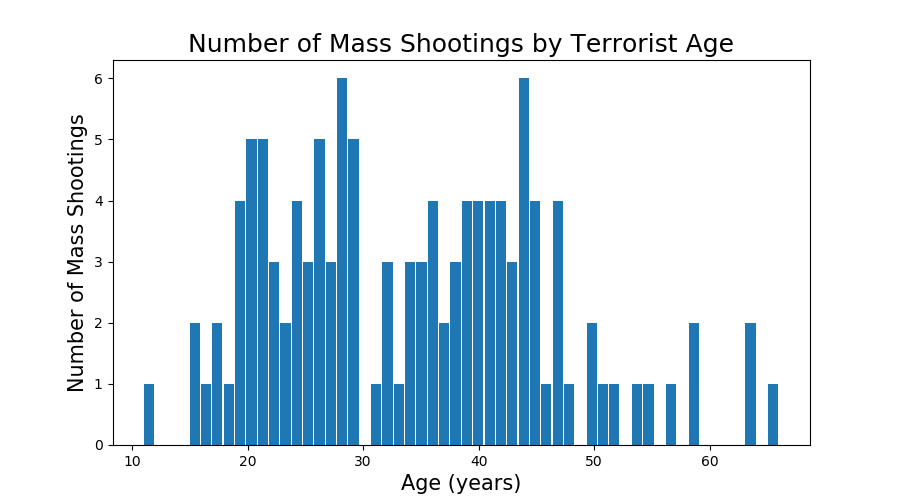

66
11
55


In [129]:
## make the figure
fig5 = plt.figure(figsize=(9,5))
ax= fig5.add_subplot(111)

## change the type to a list so it can be used in hist function
x = massShooting['age_of_shooter'].tolist()

x_pri = massShooting['age_of_shooter_2'].tolist()

for i in range(len(x)): 
    if np.isnan(x_pri[i]): 
        continue
    else: 
         x.append(x_pri[i])

num_bins = max(massShooting['age_of_shooter']) - min(massShooting['age_of_shooter']) +1 
print(max(massShooting['age_of_shooter']))
print(min(massShooting['age_of_shooter']))
print(max(massShooting['age_of_shooter']) - min(massShooting['age_of_shooter']))

# plot the data
plt.hist(x, bins=num_bins, rwidth=0.9)

# label the figure
ax.set_title('Number of Mass Shootings by Terrorist Age', fontsize = 18)
ax.set_ylabel("Number of Mass Shootings", fontsize = 15)
ax.set_xlabel("Age (years)", fontsize = 15);
plt.show()

In [134]:
print(massShooting['type'])

0      Spree
1       Mass
2      Spree
3       Mass
4       Mass
       ...  
112    Spree
113     Mass
114     Mass
115     Mass
116     Mass
Name: type, Length: 117, dtype: object


{'Spree': 18, 'Mass': 99}


<IPython.core.display.Javascript object>


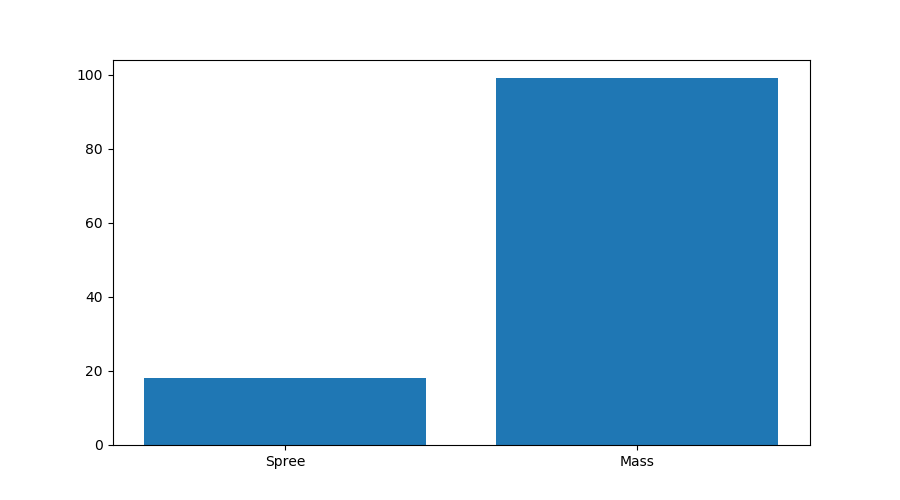

<BarContainer object of 2 artists>

In [136]:
type_dic = {}

for y in massShooting['type']:
    instance_type = y.capitalize().strip() # makes the word capital for comparison
    # and strips any blank spaces
    if instance_type == '-':
        instance_type = 'Unclear'
    if instance_type not in type_dic:
        type_dic[instance_type] = 0
    type_dic[instance_type] += 1

print(type_dic)
    
fig10 = plt.figure(figsize=(9,5))
ax= fig10.add_subplot(111)

plt.bar(type_dic.keys(), type_dic.values())


18
99


<IPython.core.display.Javascript object>


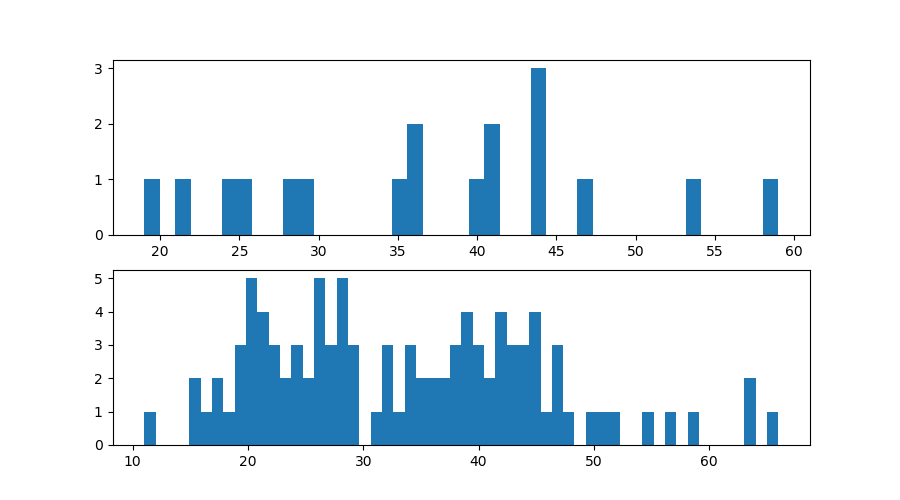

In [158]:
spree = []
mass = []

for y in range(len(massShooting)):
    the_type = massShooting.loc[y,'type'].capitalize().strip()
    if the_type == 'Spree': 
        spree.append(massShooting.loc[y,'age_of_shooter'])
    else: 
         mass.append(massShooting.loc[y,'age_of_shooter'])   
            
print(len(spree))
print(len(mass)) 
spree_bins = max(spree) -min(spree) +1
mass_bins = max(mass) - min(mass) +1 

fig11 = plt.figure(figsize=(9,5))
ax= fig11.add_subplot(211)

plt.hist(spree, bins=spree_bins)

ax=fig11.add_subplot(212)

plt.hist(mass, bins=mass_bins)

plt.show()

[1928, 1931, 1935, 1938, 1942, 1942, 1942, 1943, 1945, 1948, 1949, 1949, 1952, 1953, 1953, 1954, 1955, 1955, 1955, 1956, 1956, 1956, 1958, 1958, 1958, 1959, 1960, 1961, 1962, 1963, 1963, 1963, 1963, 1964, 1964, 1967, 1968, 1969, 1969, 1970, 1970, 1970, 1971, 1971, 1971, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1973, 1974, 1974, 1974, 1974, 1974, 1976, 1976, 1978, 1978, 1978, 1979, 1979, 1979, 1979, 1979, 1980, 1980, 1980, 1981, 1982, 1982, 1982, 1983, 1983, 1983, 1984, 1986, 1986, 1987, 1987, 1987, 1987, 1987, 1988, 1988, 1988, 1989, 1989, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1993, 1994, 1995, 1996, 1998, 1998, 1998, 1998, 1999, 1999, 2000, 2001]


<IPython.core.display.Javascript object>


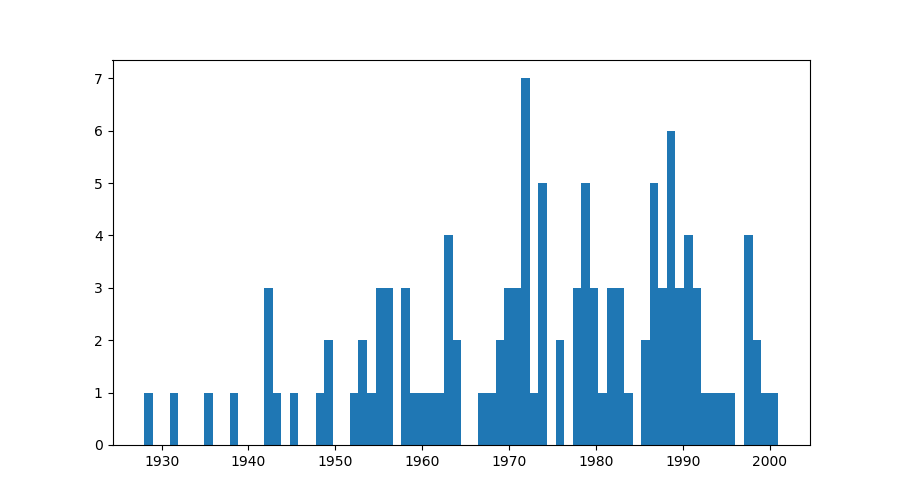

In [167]:
birth_yr = []

for y in range(len(massShooting)): 
    birth_yr.append(massShooting.loc[y,'year'] - massShooting.loc[y,'age_of_shooter'])
    
print(sorted(birth_yr))
birth_bins = max(birth_yr) - min(birth_yr) +1

fig12 = plt.figure(figsize=(9,5))
ax= fig12.add_subplot(111)

plt.hist(birth_yr, bins=birth_bins)

plt.show()
